In [1240]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import math

In [1241]:
filename=r'/Users/Amelia/Desktop/DAL.csv'

In [1242]:
def makeDataFrame(filename):
    data=pd.read_csv(filename)
    df=pd.DataFrame(data,columns=['Adj Close'])
    print(df)
    s=df.values.tolist()
    return s 

makeDataFrame(filename)

In [1243]:
# parameters
S0=30
r=0.06
N=
t=5
u=1+r+math.sqrt((1+r)**2-1)
drift=0
vol=14
d=1/u
face=50
coupon_rate = 0.04
coupon = coupon_rate*face
default_threshold = 1/3
bankrupcy_ratio = 2.4
K=55 # call value

In [1244]:
def g(x): # payoff function e.g for a call it would be max(0, x-K)
    if x==0:
        return [0, 0]
    if x <= default_threshold*S0:
        return [x*bankrupcy_ratio, 0]
    return [face, coupon] # first entry is the actual value, second is dividends or coupons

K2 has to be greater than K1

In [1245]:
p=0.5#(1+r-d)/(u-d)
q=1-p
p=1-q # fixes floating-point errors hopefully
print(p, q) # only use these in the multiplicative model

0.5 0.5


In [1246]:
def nSigFigs(num, n):
    #print(num == np.nan)
    if type(num) not in [float, int, np.float64] or num == float("NaN"): return float("NaN")
    return int(num * 10**n) / 10**n

print(p,q)

In [1247]:
def r_values(drift, vol):
    R = {}
    for i in range(N, -1, -1):
        R[i] = r + i*drift - vol*np.arange(i, -1, -1) + vol*np.arange(0, i+1, 1)
    return R

In [1248]:
rates = r_values(0, 0.005)
def p_values(stock_price_chart, rates):
    P = {i: [1]*(i+1) for i in range(N)}
    for i in range(0, N):
        for j in range(i+1):
            d = stock_price_chart[i+1][j] / stock_price_chart[i][j]
            u = stock_price_chart[i+1][j+1] / stock_price_chart[i][j]
            if stock_price_chart[i][j] == 0:
                P[i][j] = 0
            else:
                P[i][j] = (1 + rates[i][j] - d) / (u-d)
    return P

In [1249]:
def StockPrice(mode='a'): # a for additive, m for multiplicative
    StockPrice={}
    if mode == 'm':
        for i in range(N, -1, -1):
            StockPrice[i] = S0 * d ** (np.arange(i,-1,-1)) * u ** (np.arange(0,i+1,1)) #np.empty(N+1)

    elif mode == 'a':
        for i in range(N, -1, -1):
            StockPrice[i] = np.maximum(np.zeros(i+1), S0 + i*drift - vol*np.arange(i, -1, -1) + vol*np.arange(0,i+1,1))
    '''for n in range(0, N+1):
        StockPrice[N].append(S0*(u**n)*(d**(N-n)))
    for i in range(N-1, -1, -1):
        StockPrice[i]=[] #np.empty(i+1)
        for j in range(0, i+1):
            StockPrice[i].append((StockPrice[i+1][j+1])/u)'''
    return StockPrice
SP = StockPrice()
for i in range(N, -1, -1):
    print(str(i) + ": "+str([nSigFigs(x, n=4) for x in SP[i]]))

p_vals = p_values(SP, rates)

4: [0.0, 2.0, 30.0, 58.0, 86.0]
3: [0.0, 16.0, 44.0, 72.0]
2: [2.0, 30.0, 58.0]
1: [16.0, 44.0]
0: [30.0]


/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/903574956.py:6: RuntimeWarning: invalid value encountered in scalar divide
  d = stock_price_chart[i+1][j] / stock_price_chart[i][j]
/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/903574956.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  u = stock_price_chart[i+1][j+1] / stock_price_chart[i][j]


In [1250]:
def displayChart(tab):
    Chart=[]
    columns = []
    N = len(tab)-1
    for i in range(N, -1, -1):
        chart = []
        columns.append(N-i)
        for j in range(0,i):
            chart.append("")
        for j in range(i, N+1):
            entry = tab[j][i]
            chart.append(entry)
        Chart.append(chart)
    df = pd.DataFrame(Chart, columns = columns)
    return df.style.hide_index()

displayChart(SP)
displayChart(p_vals)
#displayChart(rates)

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/1105197269.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()
/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/1105197269.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()


0,1,2,3
,,,0.692857
,,0.645000,0.602143
,0.602143,0.564286,0.531429
0.564286,0.531429,0.131250,0.000000


for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(StockPrice[i][j])
    print("\n")

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(IntrinsicPut[i][j])
    print("\n")

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(IntrinsicCall[i][j])
    print("\n")

In [1251]:
def exp(x,y,p=p,r=r):
    if p != 0:
        return (x*p+y*(1-p))/(1+r)
    return 0

def rnExp(x,y):
    return exp(x,y,p,r)

In [1252]:
bond_payoff = list(map(g, SP[N]))
def vanillaBond(payoff): # coupon amount
    vanillaBond={}
    vanillaBond[N]=bond_payoff
    #IP=IntrinsicPut()
    #for n in range(0, N+1):
    #    PutPriceA[N].append(IP[N][n])
    for i in range(N-1, -1, -1):
        vanillaBond[i]=[]
        for j in range(i+1):
            entry = [0,0]
            if SP[i][j] != 0: 
                entry[0] = exp(vanillaBond[i+1][j+1][0], vanillaBond[i+1][j][0], p_vals[i][j], rates[i][j]) \
                         + exp(vanillaBond[i+1][j+1][1], vanillaBond[i+1][j][1], p_vals[i][j], rates[i][j])
                entry[0] = entry[0]
                entry[1] = coupon if SP[i][j] >= default_threshold or i<N else 0
            #print(entry)
            vanillaBond[i].append(entry)
    return vanillaBond

vBond = vanillaBond(bond_payoff)
displayChart(vBond)

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/1105197269.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()


0,1,2,3,4
,,,,"[50, 2.0]"
,,,"[48.37209302325582, 2.0]","[50, 2.0]"
,,"[47.22741433021807, 2.0]","[48.82629107981221, 2.0]","[50, 2.0]"
,"[43.344549982467704, 2.0]","[39.52246632582677, 2.0]","[28.32552471225457, 2.0]","[4.8, 0]"
"[34.615715964402504, 2.0]","[23.487750827907913, 2.0]","[3.790690589031821, 2.0]","[0, 0]","[0, 0]"


In [1253]:
def convBond(payoff):
    convBond = {}
    convBond[N] = [[max(SP[N][i], payoff[i][0]), payoff[i][1]] for i in range(N+1)]
    for i in range(N-1, -1, -1):
        convBond[i]=[]
        for j in range(i+1):
            entry = [0,0]
            if SP[i][j] != 0: 
                entry[0] = exp(convBond[i+1][j+1][0], convBond[i+1][j][0], p_vals[i][j], rates[i][j]) \
                         + exp(convBond[i+1][j+1][1], convBond[i+1][j][1], p_vals[i][j], rates[i][j])
                entry[0] = max(entry[0], SP[i][j])
                entry[1] = coupon if SP[i][j] >= default_threshold or i<N else 0
            #print(entry)
            convBond[i].append(entry)
    return convBond

cBond = convBond(bond_payoff)
displayChart(cBond)

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/1105197269.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()


0,1,2,3,4
,,,,"[86.0, 2.0]"
,,,"[73.86046511627907, 2.0]","[58.0, 2.0]"
,,"[64.09256786826882, 2.0]","[53.349429912810194, 2.0]","[50, 2.0]"
,"[53.779498504972025, 2.0]","[41.93033672883783, 2.0]","[28.32552471225457, 2.0]","[4.8, 0]"
"[40.669273426903096, 2.0]","[24.700652371469342, 2.0]","[3.790690589031821, 2.0]","[0, 0]","[0.0, 0]"


In [1254]:
'''def binomial_tree_fast(strike=K, init_s = S0, rate=r, num_pds=N, up=u, down=d): 
    # We'll use this to quickly compute callable bond prices instead of computing the whole tree multiple times
    #p = (1+r-d)/(u-d)
    #disc = 1/(1+r)

    # initialise asset prices at maturity - Time step N
    #C = SP[N] #S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1)) 
    #print("C = "+str(C))
    # initialise option values at maturity
    C = np.maximum( C - K , np.zeros(N+1) )
        
    # step backwards through tree
    for i in np.arange(N,0,-1):
        C = disc * ( p * C[1:i+1] + (1-p) * C[0:i] )
    return C

print(binomial_tree_fast())'''

def convCallableBond(tab=cBond, call_location='H', K=K): # location should be some string of Hs and Ts of length <=N
    coords = [len(call_location), call_location.count('H')]
    ccBond = tab
    for i in range(coords[0], N+1):
        for j in range(N+1):
            pass

PutPriceAChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(PutPriceA()[j][i])
    PutPriceAChart.append(chart)
df = pd.DataFrame(PutPriceAChart, columns = columns)
df.style.hide_index()

PutPriceAKChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(PutPriceAK[j][i])
    PutPriceAKChart.append(chart)
df = pd.DataFrame(PutPriceAKChart, columns = columns)
df.style.hide_index()

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(PutPriceA[i][j])
    print("\n")

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(CallPriceA[i][j])
    print("\n")

for i in range(0, t+1):
    for j in range(i,-1,-1):
        print(chooserA[i][j])
    print("\n")

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(CallPriceE[i][j])
    print("\n")

PutPriceEKChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(PutPriceEK[j][i])
    PutPriceEKChart.append(chart)
df = pd.DataFrame(PutPriceEKChart, columns = columns)
df.style.hide_index()

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(PutPriceE[i][j])
    print("\n")

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(straddleED[i][j])
    print("\n")

for i in range(0, t+1):
    for j in range(i,-1,-1):
        print(ChooserE()[i][j])
    print("\n")

for i in range(0, t+1):
    for j in range(i,-1,-1):
        print(NewEP[i][j])
    print("\n")

for i in range(0, N):
    for j in range(i,-1,-1):
        print(BerCallIntri[i][j])
    print("\n")

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(BerCallPrice[i][j])
    print("\n")

for i in range(0,EuroChooserK2):
    for j in range(i,-1,-1):
        print(BermudanE[i][j])
    print("\n")

for i in range(0,EuroChooserK2):
    for j in range(i,-1,-1):
        print(BermudanA[i][j])
    print("\n")

def BS():
    
    return exp(-r*N)*K*

In [1255]:
# Ignore this for now ... I was considering using a different datatype than dict to store these trees
from binarytree import Node
stockPriceTree = Node(S0)
stockPriceTree.left = Node(S0 + drift + vol)
stockPriceTree.right = Node(S0 + drift - vol)
#print(stockPriceTree)
stockPriceTree.left.left = Node(S0+2*drift+2*vol)
stockPriceTree.right.right = Node(S0+2*drift-2*vol)
#print(stockPriceTree)
stockPriceTree.left.right = Node(S0+2*drift)
stockPriceTree.right.left = stockPriceTree.left.right
print(stockPriceTree)

#print(stockPriceTree is stockPriceTree.left.right)


     ____30___
    /         \
  _44         _16
 /   \       /   \
58    30    30    2



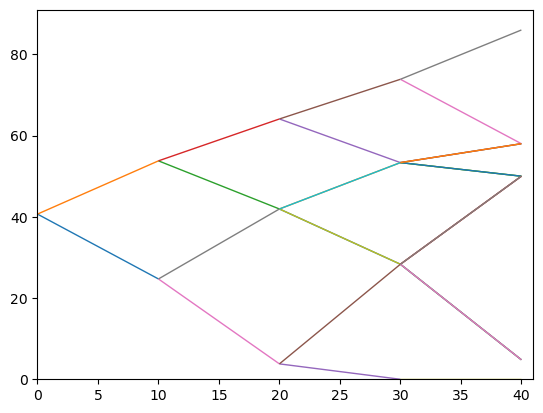

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/1105197269.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()


0,1,2,3,4
,,,,"[86.0, 2.0]"
,,,"[73.86046511627907, 2.0]","[58.0, 2.0]"
,,"[64.09256786826882, 2.0]","[53.349429912810194, 2.0]","[50, 2.0]"
,"[53.779498504972025, 2.0]","[41.93033672883783, 2.0]","[28.32552471225457, 2.0]","[4.8, 0]"
"[40.669273426903096, 2.0]","[24.700652371469342, 2.0]","[3.790690589031821, 2.0]","[0, 0]","[0.0, 0]"


In [1256]:
# Code copied and modified from https://stackoverflow.com/questions/59028711/plotting-a-binary-tree-in-matplotlib
# For the sake of better visualizations
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

def bintree_level(tab, level):#levels, x, y, depth_dist, width_up, width_down):
    #display(tab)
    N = len(tab)+level-1
    if level == N: return []
    segments = []
    x = level*10
    y = tab[level][0]
    xl = x + 10
    yl = tab[level+1][0]
    xr = x + 10
    yr = tab[level+1][1]
    if type(y) == list:
        y = y[0]
        yl = yl[0]
        yr = yr[0]
    segments.append([[x, y], [xl, yl]])
    if y != 0:
        segments.append([[x, y], [xr, yr]])
    tab_up = {i:tab[i][1:] for i in range(level+1, N+1)}
    tab_down = {i:tab[i][:-1] for i in range(level+1, N+1)}
    #if level < N:
    segments += bintree_level(tab_up, level+1)
    segments += bintree_level(tab_down, level+1)
    return segments

def draw_tree(tab): # Eg stock price table SP
    width_up = 10
    width_down = 10
    depth_dist = 10
    levels = len(tab)-1

    segs = bintree_level(tab, 0) ## IMPORTANT

    colors = [mcolors.to_rgba(c)
            for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
    
    line_segments = LineCollection(segs, linewidths=1, colors=colors, linestyle='solid')

    fig, ax = plt.subplots()
    y_upperlim = tab[levels][-1]
    if type(y_upperlim) == list:
        y_upperlim = y_upperlim[0]
    ax.set_xlim(0, levels * depth_dist + 1)
    ax.set_ylim(0, y_upperlim+5)
    ax.add_collection(line_segments)
    plt.show()

draw_tree(cBond)
displayChart(cBond)

In [1257]:
displayChart(p_vals)

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/1105197269.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()


0,1,2,3
,,,0.692857
,,0.645000,0.602143
,0.602143,0.564286,0.531429
0.564286,0.531429,0.131250,0.000000


In [1258]:
displayChart(rates)

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_33897/1105197269.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()


0,1,2,3,4
,,,,0.080000
,,,0.075000,0.070000
,,0.070000,0.065000,0.060000
,0.065000,0.060000,0.055000,0.050000
0.060000,0.055000,0.050000,0.045000,0.040000
